In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Godsgift
[nltk_data]     Olomu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("all-data.csv", encoding='ISO-8859-1', names=['Sentiment', 'Sentence'])

In [4]:
df.head()

,Sentiment,Sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
df.shape

(4846, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Sentence   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [7]:
df.describe()

,Sentiment,Sentence
count,4846,4846
unique,3,4838
top,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
freq,2879,2


In [8]:
df.isnull().sum()

Sentiment    0
Sentence     0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df['Sentiment'].value_counts()

Sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64

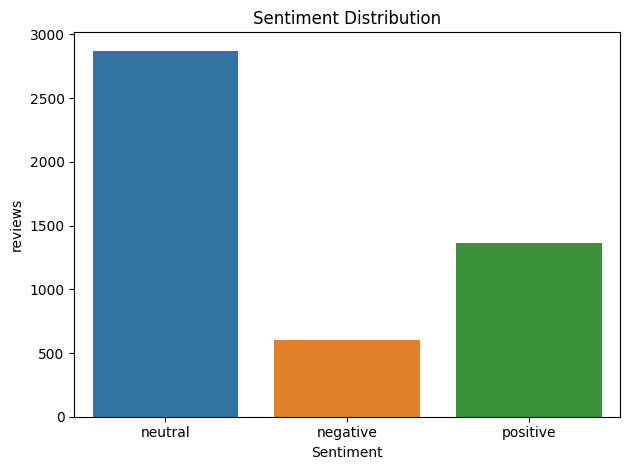

In [11]:
sns.countplot(data=df,x='Sentiment', hue='Sentiment')
plt.title('Sentiment Distribution')
plt.ylabel('reviews')
plt.tight_layout()
plt.show()

In [49]:
dataset = df.copy()

In [50]:
# MultiOutputClassifier
for row in dataset.index:

    if dataset.loc[row,'Sentiment'] == 'neutral':
        dataset.loc[row,'Sentiment'] = 0

    elif dataset.loc[row,'Sentiment'] == 'negative':
         dataset.loc[row,'Sentiment'] = -1

    else:
        dataset.loc[row,'Sentiment'] = 1


In [51]:
dataset.head()

,Sentiment,Sentence
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...


In [52]:
dataset['Sentiment'] = np.array(dataset['Sentiment'], dtype=int)

In [53]:
Y = dataset['Sentiment']
X = dataset['Sentence']

Text cleaning using NLTK

In [54]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [55]:
stemmer = PorterStemmer()

In [56]:
def text_clean(data):
    corpus = []

    for i in range(len(data)):
        review = re.sub("[^a-zA-Z0-9]", " ", str(data.iloc[i]))  # Use .iloc to safely access rows
        review = review.lower()
        review = review.split()
        review = [stemmer.stem(word) for word in review if word not in set(stopwords.words("english"))]
        review = " ".join(review)
        corpus.append(review)

    return corpus

In [57]:
X_clean = text_clean(X)

In [58]:
X_clean = np.array(X)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_clean,Y,test_size=0.2,random_state=42)

In [60]:
print(X_train.shape,X_test.shape,y_train.shape)

(3872,) (968,) (3872,)


### **Text to vector conversion**

Using Count Vector

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [62]:
# Convert sparse matrix to dense
X_train_vectorized = X_train_vectorized.toarray()
X_test_vectorized = X_test_vectorized.toarray()

In [63]:
X_train_vectorized[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(9019,))

### **ML Models**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [65]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest Classifier": RandomForestClassifier()
}

In [66]:
def model_predict():
    for name, model in models.items():
        model.fit(X_train_vectorized, y_train)
        x_test_pred = model.predict(X_test_vectorized)

        x_test_accuracy = accuracy_score(x_test_pred,y_test)
        print(f"EVALUATION of {name.upper()}")
        print(f"\nThe accuracy of test set is: {np.round(x_test_accuracy,2)}")

        class_report = classification_report(y_test, x_test_pred)
        print(f"\nClassification Report:")
        print(class_report)

        print(f"\nConfusion Matrix of {name}")
        cm = confusion_matrix(y_test, x_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cbar=False)
        plt.show()

        print("\n")


EVALUATION of LOGISTIC REGRESSION

The accuracy of test set is: 0.78

Classification Report:
              precision    recall  f1-score   support

          -1       0.77      0.60      0.68       118
           0       0.79      0.89      0.84       563
           1       0.76      0.63      0.69       287

    accuracy                           0.78       968
   macro avg       0.77      0.71      0.73       968
weighted avg       0.78      0.78      0.77       968


Confusion Matrix of Logistic Regression


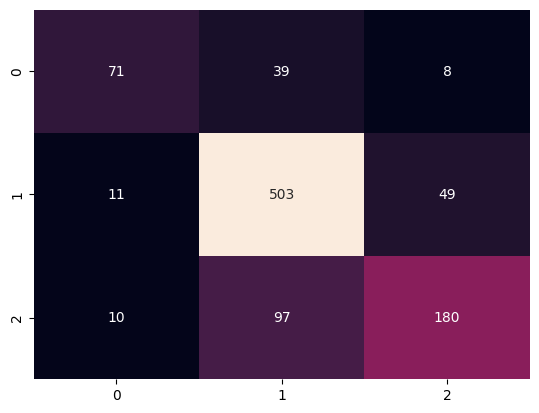



EVALUATION of RANDOM FOREST CLASSIFIER

The accuracy of test set is: 0.75

Classification Report:
              precision    recall  f1-score   support

          -1       0.83      0.46      0.59       118
           0       0.73      0.98      0.83       563
           1       0.85      0.43      0.57       287

    accuracy                           0.75       968
   macro avg       0.80      0.62      0.66       968
weighted avg       0.77      0.75      0.73       968


Confusion Matrix of Random Forest Classifier


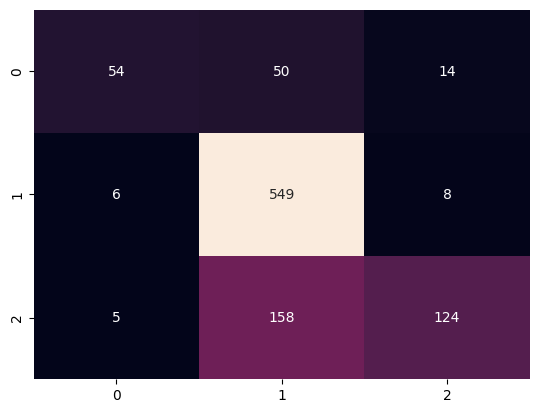

In [67]:
model_predict()

### **FinBERT**

I will show how you can use FinBERT easily for sentiment analysis.

FinBERT is a pre-trained NLP model to analyze sentiment of financial text. It is built by further training the BERT language model in the finance domain, using a large financial corpus and thereby fine-tuning it for financial sentiment classification. Financial PhraseBank by Malo et al. (2014) is used for fine-tuning.

The model will give softmax outputs for three labels: positive, negative or neutral.

In [31]:
import scipy
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In the next step I will directly download FinBERT directly from Huggingface.
https://huggingface.co/ProsusAI/finbert

In [32]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [33]:
# Use the source dataset
X = df['Sentence'].to_list()
y = df['Sentiment'].to_list()

### **Predict**

Finally we are able to loop over the X list and predict for every entry the label. I will safe the predicted label as well as the probability for that class.

In [34]:
preds = []
preds_proba = []
tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}

In [35]:
for x in X:
    with torch.no_grad():
        input_sequence = tokenizer(x, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
        k: v
        for k, v in zip(
            model.config.id2label.values(),
            scipy.special.softmax(logits.numpy().squeeze()),
        )
    }
    sentimentFinbert = max(scores, key=scores.get)
    probabilityFinbert = max(scores.values())
    preds.append(sentimentFinbert)
    preds_proba.append(probabilityFinbert)

In [36]:
accuracy_score = accuracy_score(y, preds)
print(f'Accuracy-Score: {np.round(accuracy_score,2)}')

Accuracy-Score: 0.89


In [37]:
class_report = classification_report(y, preds)
print(f"Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.97      0.88       604
     neutral       0.96      0.86      0.91      2873
    positive       0.81      0.92      0.86      1363

    accuracy                           0.89      4840
   macro avg       0.86      0.92      0.88      4840
weighted avg       0.90      0.89      0.89      4840



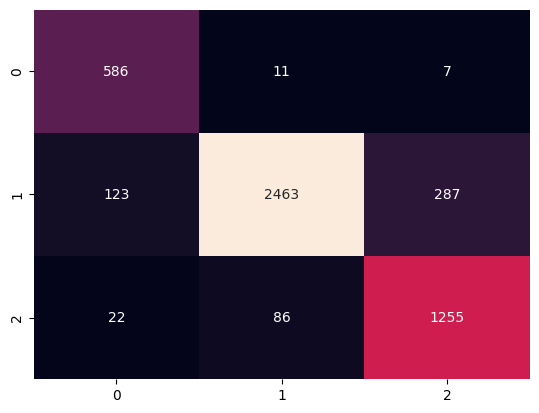

In [38]:
cm = confusion_matrix(y, preds)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.show()

### **Future Prediction**


Add a function for future predictions using the FinBERT model, this function will allow you to input a review and get the sentiment prediction (positive, negative, or neutral) along with the confidence score.

In [39]:
def predict_sentiment(review):
    """
    Predicts the sentiment of a given review using the FinBERT model.

    Args:
        review (str): The review text to analyze.

    Returns:
        dict: A dictionary containing the predicted sentiment and the confidence score.
    """
    tokenizer_kwargs = {"padding": True, "truncation": True, "max_length": 512}

    with torch.no_grad():
        input_sequence = tokenizer(review, return_tensors="pt", **tokenizer_kwargs)
        logits = model(**input_sequence).logits
        scores = {
            k: v
            for k, v in zip(
                model.config.id2label.values(),
                scipy.special.softmax(logits.numpy().squeeze()),
            )
        }

    predicted_sentiment = max(scores, key=scores.get)
    confidence_score = max(scores.values())

    return {
        "sentiment": predicted_sentiment,
        "confidence": float(confidence_score)
    }


In [40]:
def predict(news):
    prediction = predict_sentiment(news)

    print(f"News: {news}")
    print(f"Predicted Sentiment: {prediction['sentiment']}")
    print(f"Confidence Score: {prediction['confidence']:.4f}")

In [68]:
news = "ABC Company goods drop off by '5%' and company to go on brankrupt"
predict(news)

News: ABC Company goods drop off by '5%' and company to go on brankrupt
Predicted Sentiment: negative
Confidence Score: 0.8823


In [69]:
# Example usage:
news = "The company's financial performance was great this quarter."
predict(news)

News: The company's financial performance was great this quarter.
Predicted Sentiment: positive
Confidence Score: 0.9557


In [70]:
news = "Apple Stock Price Increase by 10% in the first quarter of 2025."
predict(news)

News: Apple Stock Price Increase by 10% in the first quarter of 2025.
Predicted Sentiment: positive
Confidence Score: 0.9215


In [71]:
news = "Banana Supply Company Bankruptted."
predict(news)

News: Banana Supply Company Bankruptted.
Predicted Sentiment: negative
Confidence Score: 0.8996


In [72]:
news = "AP Oil CEO says 'Sales at no positive or negative changes' after 6 months of production"
predict(news)

News: AP Oil CEO says 'Sales at no positive or negative changes' after 6 months of production
Predicted Sentiment: neutral
Confidence Score: 0.3603
